In [3]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import joblib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [4]:
#model = joblib.load('Model_developed_RandomForestRegression.joblib')
model = joblib.load('Model_developed_GradientBoost_Regression.joblib')
data = pd.read_excel('DML_B5_Test_Full.xlsx')

In [5]:
all_x_columns = data.iloc[:,:-1]

scaler = MinMaxScaler()
all_x_columns[list(all_x_columns.columns)] = scaler.fit_transform(all_x_columns[list(all_x_columns.columns)]) 

X = all_x_columns.values

In [6]:


predictions=model.predict(X)
print(predictions.shape)
print(predictions)

(291,)
[0.00026219 0.00026219 0.00025679 0.00026076 0.00030882 0.00034257
 0.00041664 0.00044159 0.00046548 0.00052022 0.00058042 0.00061075
 0.00063809 0.000671   0.00064137 0.00068327 0.00082781 0.00080157
 0.00086194 0.0009289  0.00092726 0.00093583 0.00107908 0.00103219
 0.00112805 0.00121889 0.00119233 0.00128904 0.00123802 0.0014043
 0.0014043  0.00135741 0.00151567 0.00156158 0.00160781 0.00165599
 0.00170123 0.00177501 0.0017211  0.00186414 0.00196263 0.00193408
 0.00193408 0.00194705 0.002077   0.00215229 0.00213889 0.00215722
 0.00215722 0.00229929 0.00229929 0.00241394 0.00246082 0.00253574
 0.00253574 0.00262217 0.00260383 0.00262217 0.00274328 0.0029149
 0.0029149  0.0029149  0.00301027 0.00301027 0.00303882 0.00311009
 0.00315245 0.00324298 0.00324298 0.00323994 0.00341125 0.00341428
 0.00350781 0.00353879 0.00360178 0.00364589 0.00366839 0.00378111
 0.00392557 0.00388813 0.00388353 0.00391498 0.0039764  0.0039764
 0.0040068  0.00419425 0.00419089 0.00423372 0.00423928 0.

In [7]:
output= data.copy()
output['DML_Prediction'] = predictions
output.to_excel('DML_B5_Test_Full_prediction.xlsx', index = False)

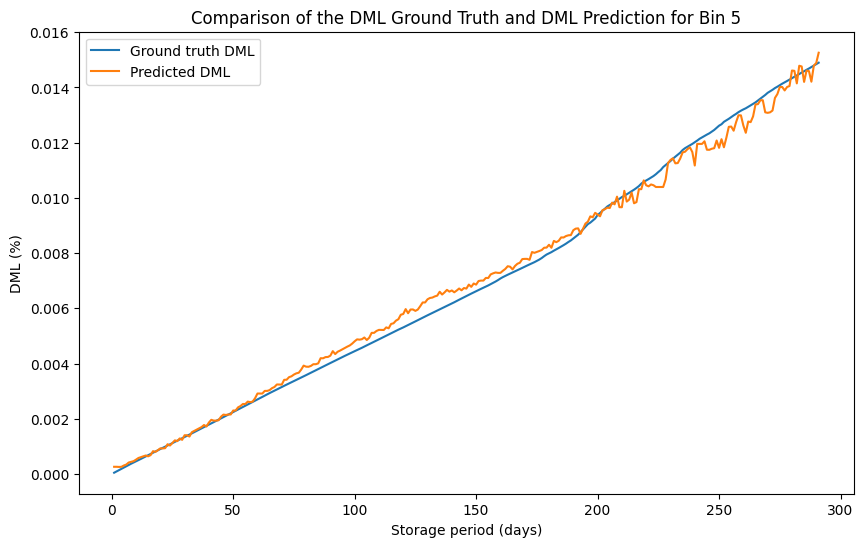

In [8]:
# Plot data
output_data = pd.read_excel('DML_B5_Test_Full_prediction.xlsx')
gt_dml=output_data['DML_Percent']
pred_dml= output_data['DML_Prediction']
storage_dml_time = output_data['Storage_time']

plt.figure(figsize=(10,6))
#plt.plot(gt_dml,label='Ground truth DML', marker='o')
#plt.plot(pred_dml,label='Predicted DML', marker='s')
#using the actual storage time data
plt.plot(storage_dml_time, gt_dml,label='Ground truth DML')
plt.plot(storage_dml_time, pred_dml,label='Predicted DML')

plt.title('Comparison of the DML Ground Truth and DML Prediction for Bin 5')

plt.xlabel('Storage period (days)')
plt.ylabel('DML (%)')
plt.legend()
plt.show()


In [9]:
# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(gt_dml, pred_dml)
rmse = np.sqrt(mse)
r2 = r2_score(gt_dml, pred_dml)

print(f"Test MSE: {mse:.5f}")
print(f"Test RMSE: {rmse:.5f}")
print(f"Test R²: {r2:.4f}")


Test MSE: 0.00000
Test RMSE: 0.00032
Test R²: 0.9946


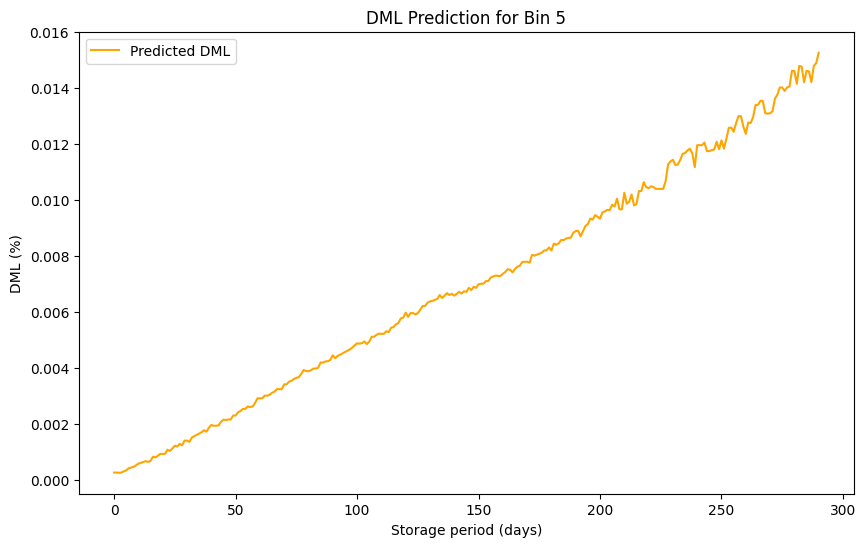

: 

In [ ]:
gt_dml=output_data['DML_Percent']
pred_dml= output_data['DML_Prediction']

plt.figure(figsize=(10,6))

plt.plot(pred_dml,label='Predicted DML', color='orange')

plt.xlabel('Storage period (days)')
plt.ylabel('DML (%)')
plt.title('DML Prediction for Bin 5')
plt.legend()
plt.show()